In [147]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [148]:
# Set the base URL
base_url = "https://data.cityofnewyork.us/resource/uip8-fykc.json?"
# Set the query URL
query_url = base_url + "$limit=50000"
response = requests.get(query_url).json()
# Create a DataFrame
original_df = pd.DataFrame(response)
# Display original df
original_df

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi
0,280255493,2024-01-10T00:00:00.000,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,"{'type': 'Point', 'coordinates': [-73.956312, ...",37,4,23,17,12424
1,279805419,2024-01-02T00:00:00.000,157,RAPE 1,104,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.6744956865259,-73.9305713255961,"{'type': 'Point', 'coordinates': [-73.93057132...",16,2,49,49,17615
2,279895750,2024-01-03T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,"{'type': 'Point', 'coordinates': [-73.846499, ...",62,3,41,64,15314
3,280809090,2024-01-19T00:00:00.000,511,"CONTROLLED SUBSTANCE, POSSESSI",235,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,"{'type': 'Point', 'coordinates': [-73.843908, ...",59,5,12,32,11270
4,280357135,2024-01-11T00:00:00.000,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,"{'type': 'Point', 'coordinates': [-73.934343, ...",69,2,49,52,18181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,283662436,2024-03-12T00:00:00.000,268,CRIMINAL MIS 2 & 3,121,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,K,84,0,65+,F,BLACK,988174,190975,40.690859,-73.985848,"{'type': 'Point', 'coordinates': [-73.985848, ...",68,2,38,54,16865
49996,284068720,2024-03-20T00:00:00.000,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211300,F,M,25,0,25-44,M,BLACK HISPANIC,1002076,231440,40.801908,-73.935612,"{'type': 'Point', 'coordinates': [-73.935612, ...",7,4,35,16,13093
49997,283384015,2024-03-07T00:00:00.000,114,OBSTR BREATH/CIRCUL,344,ASSAULT 3 & RELATED OFFENSES,PL 121110A,M,M,28,0,25-44,M,BLACK,997373,231879,40.803121,-73.952599,"{'type': 'Point', 'coordinates': [-73.952599, ...",18,4,36,18,12423
49998,283729925,2024-03-14T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,48,0,25-44,F,WHITE HISPANIC,1015629,246174,40.842311,-73.886588,"{'type': 'Point', 'coordinates': [-73.886588, ...",35,5,43,31,11269


In [149]:
original_df.dtypes

arrest_key                     object
arrest_date                    object
pd_cd                          object
pd_desc                        object
ky_cd                          object
ofns_desc                      object
law_code                       object
law_cat_cd                     object
arrest_boro                    object
arrest_precinct                object
jurisdiction_code              object
age_group                      object
perp_sex                       object
perp_race                      object
x_coord_cd                     object
y_coord_cd                     object
latitude                       object
longitude                      object
geocoded_column                object
:@computed_region_f5dn_yrer    object
:@computed_region_yeji_bk3q    object
:@computed_region_92fq_4b7q    object
:@computed_region_sbqj_enih    object
:@computed_region_efsh_h5xi    object
dtype: object

In [150]:
original_df.columns

Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'geocoded_column',
       ':@computed_region_f5dn_yrer', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi'],
      dtype='object')

In [151]:
original_df.drop(columns=['pd_cd', 'arrest_key', 'x_coord_cd', 'y_coord_cd', 'ky_cd', 'jurisdiction_code', ':@computed_region_f5dn_yrer', ':@computed_region_yeji_bk3q' ], inplace=True)

In [152]:
original_df

,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,age_group,perp_sex,perp_race,latitude,longitude,geocoded_column,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi
0,2024-01-10T00:00:00.000,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,PL 1601001,F,M,26,<18,M,BLACK,40.814845,-73.956312,"{'type': 'Point', 'coordinates': [-73.956312, ...",23,17,12424
1,2024-01-02T00:00:00.000,RAPE 1,RAPE,PL 1303501,F,K,77,25-44,M,WHITE HISPANIC,40.6744956865259,-73.9305713255961,"{'type': 'Point', 'coordinates': [-73.93057132...",49,49,17615
2,2024-01-03T00:00:00.000,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,65+,F,WHITE,40.662526,-73.846499,"{'type': 'Point', 'coordinates': [-73.846499, ...",41,64,15314
3,2024-01-19T00:00:00.000,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS,PL 2200300,M,B,49,45-64,M,BLACK,40.855793,-73.843908,"{'type': 'Point', 'coordinates': [-73.843908, ...",12,32,11270
4,2024-01-11T00:00:00.000,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,PL 1200502,F,K,81,25-44,F,BLACK,40.694456,-73.934343,"{'type': 'Point', 'coordinates': [-73.934343, ...",49,52,18181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2024-03-12T00:00:00.000,CRIMINAL MIS 2 & 3,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,K,84,65+,F,BLACK,40.690859,-73.985848,"{'type': 'Point', 'coordinates': [-73.985848, ...",38,54,16865
49996,2024-03-20T00:00:00.000,STRANGULATION 1ST,FELONY ASSAULT,PL 1211300,F,M,25,25-44,M,BLACK HISPANIC,40.801908,-73.935612,"{'type': 'Point', 'coordinates': [-73.935612, ...",35,16,13093
49997,2024-03-07T00:00:00.000,OBSTR BREATH/CIRCUL,ASSAULT 3 & RELATED OFFENSES,PL 121110A,M,M,28,25-44,M,BLACK,40.803121,-73.952599,"{'type': 'Point', 'coordinates': [-73.952599, ...",36,18,12423
49998,2024-03-14T00:00:00.000,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,48,25-44,F,WHITE HISPANIC,40.842311,-73.886588,"{'type': 'Point', 'coordinates': [-73.886588, ...",43,31,11269


In [153]:
original_df.columns

Index(['arrest_date', 'pd_desc', 'ofns_desc', 'law_code', 'law_cat_cd',
       'arrest_boro', 'arrest_precinct', 'age_group', 'perp_sex', 'perp_race',
       'latitude', 'longitude', 'geocoded_column',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi'],
      dtype='object')

In [154]:
original_df.drop(columns=[':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih', ':@computed_region_efsh_h5xi' ], inplace=True)

In [155]:
original_df.columns

Index(['arrest_date', 'pd_desc', 'ofns_desc', 'law_code', 'law_cat_cd',
       'arrest_boro', 'arrest_precinct', 'age_group', 'perp_sex', 'perp_race',
       'latitude', 'longitude', 'geocoded_column'],
      dtype='object')

In [156]:
original_df

,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,age_group,perp_sex,perp_race,latitude,longitude,geocoded_column
0,2024-01-10T00:00:00.000,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,PL 1601001,F,M,26,<18,M,BLACK,40.814845,-73.956312,"{'type': 'Point', 'coordinates': [-73.956312, ..."
1,2024-01-02T00:00:00.000,RAPE 1,RAPE,PL 1303501,F,K,77,25-44,M,WHITE HISPANIC,40.6744956865259,-73.9305713255961,"{'type': 'Point', 'coordinates': [-73.93057132..."
2,2024-01-03T00:00:00.000,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,65+,F,WHITE,40.662526,-73.846499,"{'type': 'Point', 'coordinates': [-73.846499, ..."
3,2024-01-19T00:00:00.000,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS,PL 2200300,M,B,49,45-64,M,BLACK,40.855793,-73.843908,"{'type': 'Point', 'coordinates': [-73.843908, ..."
4,2024-01-11T00:00:00.000,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,PL 1200502,F,K,81,25-44,F,BLACK,40.694456,-73.934343,"{'type': 'Point', 'coordinates': [-73.934343, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2024-03-12T00:00:00.000,CRIMINAL MIS 2 & 3,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,K,84,65+,F,BLACK,40.690859,-73.985848,"{'type': 'Point', 'coordinates': [-73.985848, ..."
49996,2024-03-20T00:00:00.000,STRANGULATION 1ST,FELONY ASSAULT,PL 1211300,F,M,25,25-44,M,BLACK HISPANIC,40.801908,-73.935612,"{'type': 'Point', 'coordinates': [-73.935612, ..."
49997,2024-03-07T00:00:00.000,OBSTR BREATH/CIRCUL,ASSAULT 3 & RELATED OFFENSES,PL 121110A,M,M,28,25-44,M,BLACK,40.803121,-73.952599,"{'type': 'Point', 'coordinates': [-73.952599, ..."
49998,2024-03-14T00:00:00.000,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,48,25-44,F,WHITE HISPANIC,40.842311,-73.886588,"{'type': 'Point', 'coordinates': [-73.886588, ..."


In [157]:
pd.set_option('display.max_rows', 200)

In [158]:
original_df['ofns_desc'].value_counts()

ofns_desc
ASSAULT 3 & RELATED OFFENSES            6940
PETIT LARCENY                           5048
FELONY ASSAULT                          4079
DANGEROUS DRUGS                         3787
VEHICLE AND TRAFFIC LAWS                3183
MISCELLANEOUS PENAL LAW                 3148
GRAND LARCENY                           2431
ROBBERY                                 2358
CRIMINAL MISCHIEF & RELATED OF          2243
DANGEROUS WEAPONS                       1951
OTHER OFFENSES RELATED TO THEF          1765
OFFENSES AGAINST PUBLIC ADMINI          1538
BURGLARY                                1249
OFFENSES INVOLVING FRAUD                1103
SEX CRIMES                              1070
FORGERY                                 1009
OFF. AGNST PUB ORD SENSBLTY &            880
POSSESSION OF STOLEN PROPERTY            861
CRIMINAL TRESPASS                        607
OTHER TRAFFIC INFRACTION                 596
INTOXICATED & IMPAIRED DRIVING           505
GRAND LARCENY OF MOTOR VEHICLE           437


In [159]:
pd.set_option('display.max_columns', None)

In [160]:
original_df.isna().sum()

arrest_date          0
pd_desc              0
ofns_desc            0
law_code             0
law_cat_cd         317
arrest_boro          0
arrest_precinct      0
age_group            0
perp_sex             0
perp_race            0
latitude             0
longitude            0
geocoded_column      0
dtype: int64

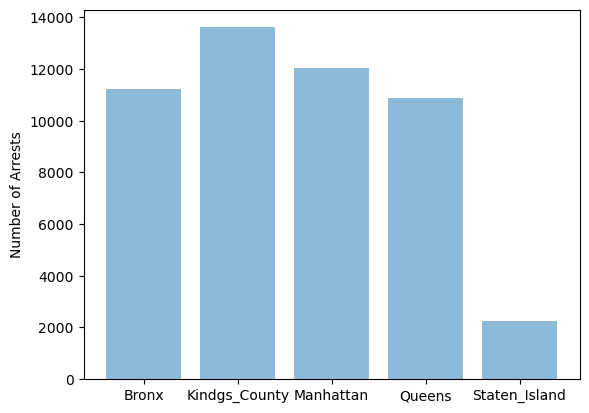

In [161]:
boroughs= ['Bronx','Kindgs_County', 'Manhattan', 'Queens', 'Staten_Island']
arrest=[11227, 13612, 12024, 10878, 2259]
x_axis = np.arange(len(arrest))

plt.bar(x_axis, arrest, align='center', alpha=0.5)
plt.xticks(x_axis, boroughs)
plt.ylabel('Number of Arrests')
plt.show()

In [162]:
df=original_df.groupby('arrest_boro')[['arrest_date']].count()
df

,arrest_date
arrest_boro,
B,11227
K,13612
M,12024
Q,10878
S,2259


In [169]:
df_sex_age_borough=original_df.groupby(['arrest_boro' ,'perp_sex', 'age_group'])[['arrest_date']].count()
df_sex_age_borough

arrest_date
arrest_boro perp_sex age_group             
B           F        18-24              346
                     25-44             1127
                     45-64              319
                     65+                 20
                     <18                 89
            M        18-24             1724
                     25-44             5540
                     45-64             1622
                     65+                131
                     <18                309
K           F        18-24              394
                     25-44             1383
                     45-64              440
                     65+                 25
                     <18                 91
            M        18-24             1858
                     25-44             6471
                     45-64             2293
                     65+                180
                     <18                477
M           F        18-24              392
                     25-44             1333
                     45-64              334
                     65+                 25
                     <18                 69
            M        18-24             1464
                     25-44             5713
                     45-64             2195
                     65+                172
                     <18                327
Q           F        18-24              332
                     25-44             1079
                     45-64              351
                     65+                 37
                     <18                 55
            M        18-24             1577
                     25-44             5255
                     45-64             1680
                     65+                177
                     <18                335
S           F        18-24               85
                     25-44              263
                     45-64               77
                     65+                 10
                     <18                 19
            M        18-24              280
                     25-44             1070
                     45-64              361
                     65+                 44
                     <18                 50

In [170]:
df_sex_age_borough_reset = df_sex_age_borough.reset_index()


In [171]:
pivot_df = df_sex_age_borough_reset.pivot_table(index=['arrest_boro', 'age_group'], columns='perp_sex', values='arrest_date')

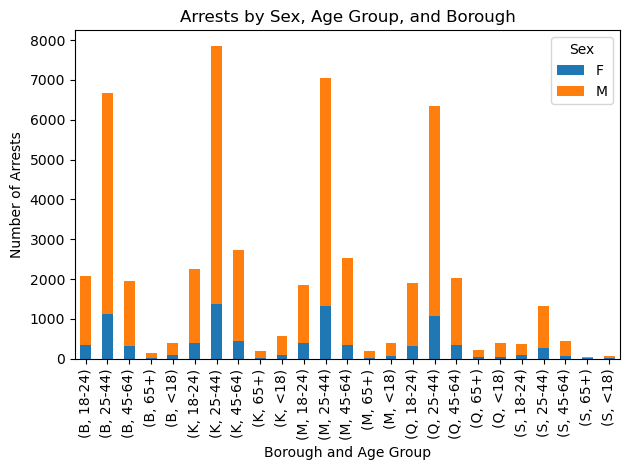

In [174]:
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Borough and Age Group')
plt.ylabel('Number of Arrests')
plt.title('Arrests by Sex, Age Group, and Borough')
plt.xticks(rotation=90)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()